## Question: 
Predicting played hours based on the following predictor variables:  experience level, age and gender

In [76]:
#load packages
library(tidyverse)
library(repr)
library(tidymodels)

In [77]:
#loading data
players <- read_csv("players1.csv")
head(players)
tail(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


## Using linear regression model

In [78]:
players_split <- initial_split(players, prop=0.75,strata = experience)
players_train <- training(players_split)
players_test <- testing(players_split)

players_spec <- linear_reg()|>
    set_engine("lm")|>
    set_mode("regression")

players_recipe <- recipe(played_hours ~ experience + gender + Age, data=players_train)

players_fit <- workflow() |>
    add_recipe(players_recipe)|>
    add_model(players_spec)|>
    fit(data=players_train)
players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
            (Intercept)        experienceAmateur       experienceBeginner  
                 1.0624                   6.5242                   0.1727  
          experiencePro        experienceRegular        experienceVeteran  
                 3.5976                   9.3713                       NA  
          genderAgender             genderFemale               genderMale  
                18.6413                   8.7150                   5.2586  
       genderNon-binary  genderPrefer not to say       genderTwo-Spirited  
                 1.8793                   3.2939                       NA  
                    Age  
 

In [79]:
extract_fit_parsnip(players_fit)
tidy(players_fit)

parsnip model object


Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
            (Intercept)        experienceAmateur       experienceBeginner  
                 1.0624                   6.5242                   0.1727  
          experiencePro        experienceRegular        experienceVeteran  
                 3.5976                   9.3713                       NA  
          genderAgender             genderFemale               genderMale  
                18.6413                   8.7150                   5.2586  
       genderNon-binary  genderPrefer not to say       genderTwo-Spirited  
                 1.8793                   3.2939                       NA  
                    Age  
                -0.2668  


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.0623555,15.8660962,0.06695759,0.9467160
experienceAmateur,6.5242331,5.5706517,1.17117951,0.2436206
experienceBeginner,0.1726831,6.5049196,0.02654653,0.9788612
experiencePro,3.5975680,10.0887662,0.35659148,0.7219627
experienceRegular,9.3712774,6.3342720,1.47945611,0.1413832
experienceVeteran,NA,NA,NA,NA
genderAgender,18.6413416,28.3730354,0.65700907,0.5123104
genderFemale,8.7149554,14.6875667,0.59335597,0.5539507
genderMale,5.2586095,14.3145057,0.36736228,0.7139327


In [80]:
players_test_result <- players_fit|>
    predict(players_test)|>
    bind_cols(players_test)|>
    metrics(truth=played_hours, estimate=.pred)
players_test_result

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,38.2877178
rsq,standard,0.0597003
mae,standard,12.0894723


Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


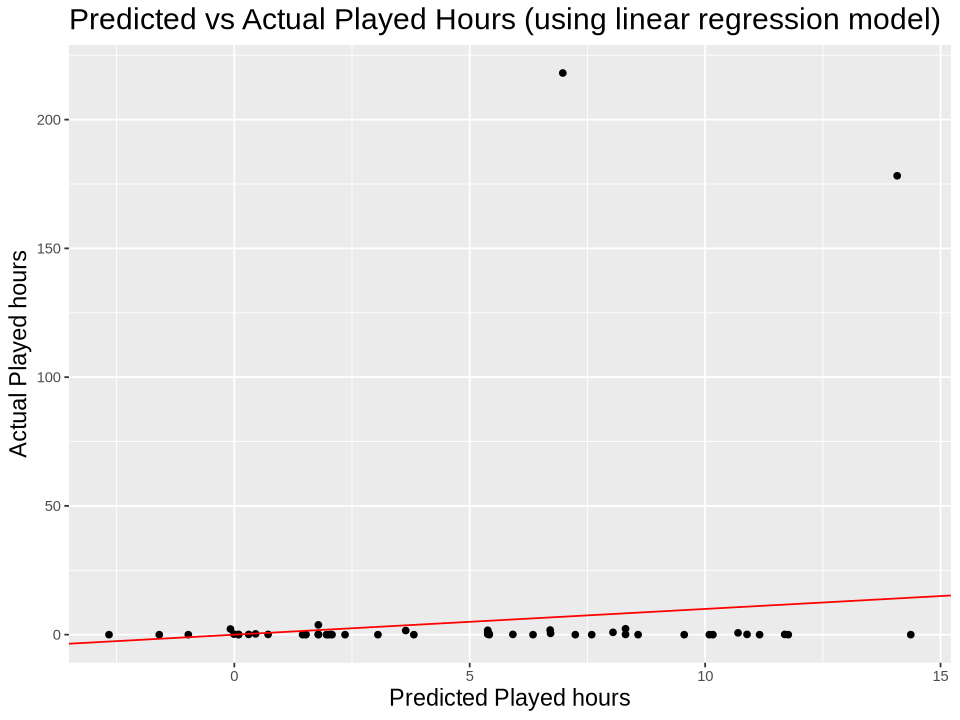

In [81]:
options(repr.plot.width = 8, repr.plot.height = 6)
players_test_visual <- players_fit |>
    predict(players_test) |> 
    bind_cols(players_test) |>
    ggplot(aes(x = .pred, y = played_hours)) +
    geom_point() +
    geom_abline(slope = 1, intercept = 0, color="red") +
    labs(x = "Predicted Played hours", y = "Actual Played hours")+
    theme(plot.title = element_text(size = 18),
    axis.title = element_text(size = 14))+
    ggtitle("Predicted vs Actual Played Hours (using linear regression model)")
players_test_visual

## Using knn model

In [82]:
players <- read.csv("players1.csv")|>
  drop_na(played_hours, experience, gender, Age)

glimpse(players)

Rows: 194
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <int> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


In [83]:
set.seed(123)
players_split <- initial_split(players, prop = 0.75, strata = experience)
players_train <- training(players_split)
players_test  <- testing(players_split)

players_recipe <- recipe(played_hours ~ experience + gender + Age, data = players_train) |>
  step_dummy(all_nominal_predictors(), one_hot = TRUE)|>  
  step_normalize(all_numeric_predictors())               

lm_spec <- linear_reg()|>
  set_engine("lm") |>
  set_mode("regression")

lm_workflow <- workflow()|>
  add_recipe(players_recipe) |>
  add_model(lm_spec)

lm_fit <- lm_workflow|>
    fit(data = players_train)

lm_predictions <- predict(lm_fit, new_data = players_test) |>
  bind_cols(players_test|>
            select(played_hours))

lm_metrics <- lm_predictions |>
  metrics(truth = played_hours, estimate = .pred)
lm_metrics

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,12.292628141
rsq,standard,0.000114934
mae,standard,8.885558038


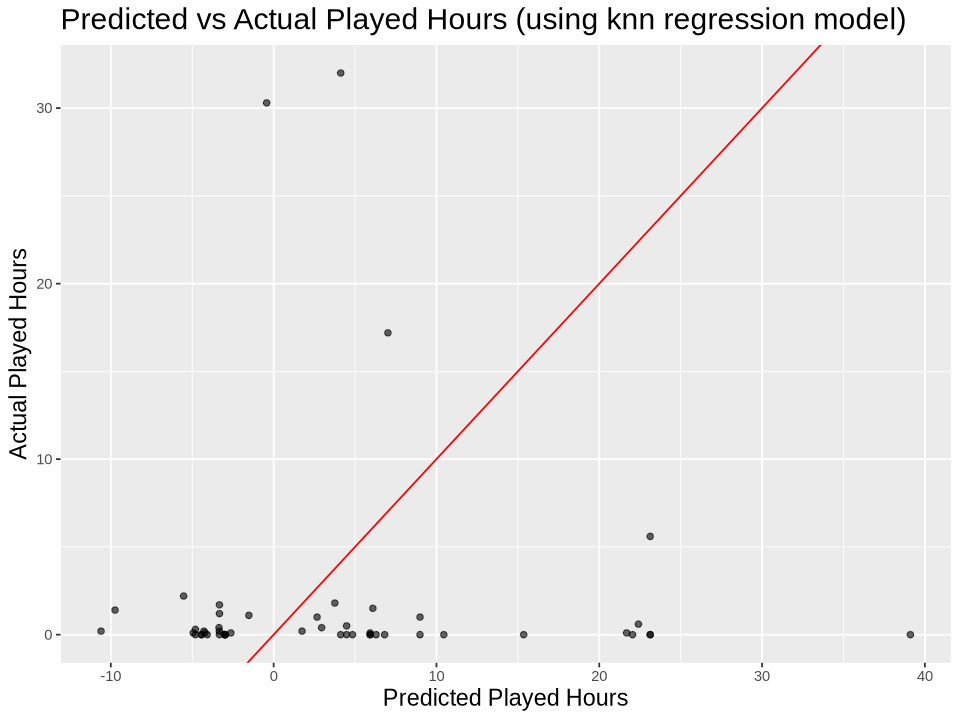

In [84]:
lm_visualization <- ggplot(lm_predictions, aes(x = .pred, y = played_hours)) +
  geom_point(alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(title = "Predicted vs Actual Played Hours",
       x = "Predicted Played Hours",
       y = "Actual Played Hours")+
    theme(plot.title = element_text(size = 18),
        axis.title = element_text(size = 14))+
        ggtitle("Predicted vs Actual Played Hours (using knn regression model)")
lm_visualization